<a href="https://colab.research.google.com/github/SungaHwang/ML_practice/blob/master/%EC%8B%AC%EB%A6%AC%EC%84%B1%ED%96%A5%EC%98%88%EC%B8%A1AI%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심리 성향 예측 AI 경진대회

### 데이터 설명(출처: Dacon)

* index
* Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
* Qa : Secret
* Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
* Qc : Anyone who completely trusts anyone else is asking for trouble.
* Qd : Secret
* Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
* Qf : There is no excuse for lying to someone else.
* Qg : Secret
* Qh : Most people forget more easily the death of their parents than the loss of their property.
* Qi : Secret
* Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
* Qk : All in all, it is better to be humble and honest than to be important and dishonest.
* QI : Secret
* Qm : It is hard to get ahead without cutting corners here and there.
* Qn : Secret
* Qo : The best way to handle people is to tell them what they want to hear.
* Qp : Secret
* Qq : Most people are basically good and kind.
* Qr : One should take action only when sure it is morally right.
* Qs : It is wise to flatter important people.
* Qt : Secret
* Q_E(a~t) : 질문을 답할 때까지의 시간


* age_group : 연령


* education : 교육 수준- 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


* engnat : 모국어가 영어- 1=Yes, 2=No, 0=무응답


* familysize : 형제자매 수


* gender : 성별- Male, Female


* hand : 필기하는 손- 1=Right, 2=Left, 3=Both, 0=무응답


* married : 혼인 상태- 1=Never married, 2=Currently married, 3=Previously married, 0=Other


* race : 인종- Asian, Arab, Black, Indigenous Australian, Native American, White, Other


* religion : 종교- Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


* tp__(01~07) : items were rated "I see myself as:" _____ such that- tp01 : Extraverted, enthusiastic.- tp02 : Critical, quarrelsome.
- tp03 : Dependable, self-disciplined.- tp04 : Anxious, easily upset. - tp05 : Open to new experiences, complex.- tp06 : Reserved, quiet.- tp07 : Sympathetic, warm.- tp08 : Disorganized, careless.- tp09 : Calm, emotionally stable.- tp10 : Conventional, uncreative.
								
							


#### 순서형 변수
* urban : 유년기의 거주 구역 - 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

* wr_(01~13) : 실존하는 해당 단어의 정의을 앎- 1=Yes, 0=No

* wf_(01~03) : 허구인 단어의 정의를 앎- 1=Yes, 0=No

#### target
* voted (타겟): 지난 해 국가 선거 투표 여부- 1=Yes, 2=No


마키아벨리니즘 데스트 score 계산법
: https://dacon.io/competitions/official/235647/talkboard/401557?page=1&dtype=recent&ptype=pub

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

## 데이터 불러오고 확인

In [2]:
# 데이터 불러오기
train = pd.read_csv('/content/train.csv')
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


In [3]:
# 데이터 불러오기
test = pd.read_csv('/content/test_x.csv')
test

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0


In [4]:
train.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

* 결측값은 없음

## EDA

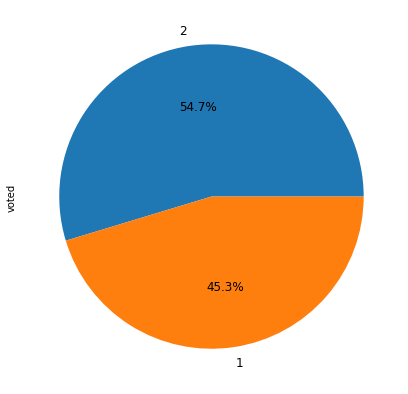

In [6]:
f, ax = plt.subplots(figsize=(7, 7))
train['voted'].value_counts().plot.pie(ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

* 타깃변수 확인: 1- YES, 2- No
* 타겟 데이터의 불균형 발견되지 않음

In [7]:
voted = train[train['voted']==1]
unvoted = train[train['voted']==2]

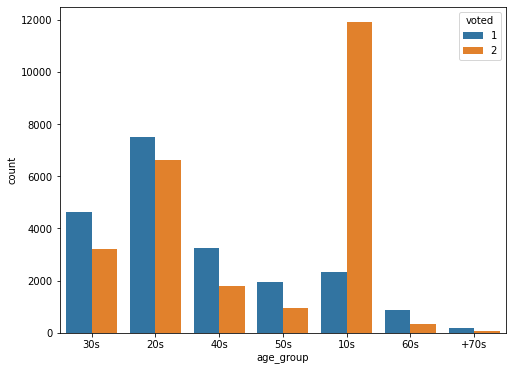

In [8]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group', hue = train['voted'])

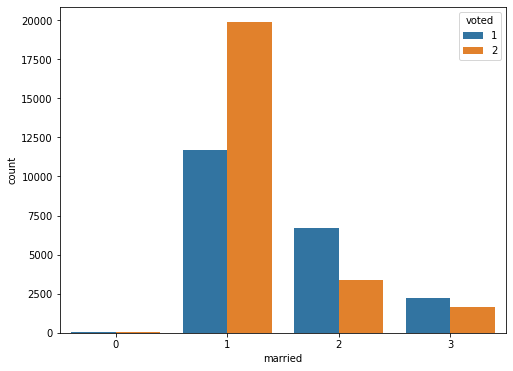

In [9]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'married', hue = train['voted'])

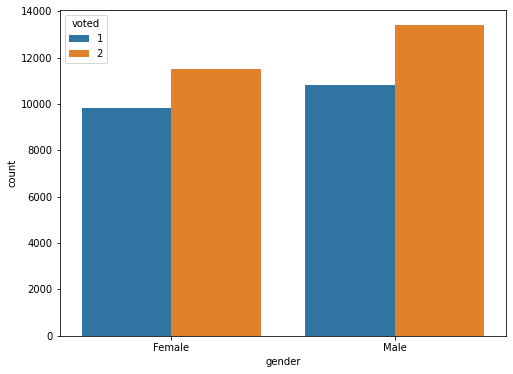

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'gender', hue = train['voted'])

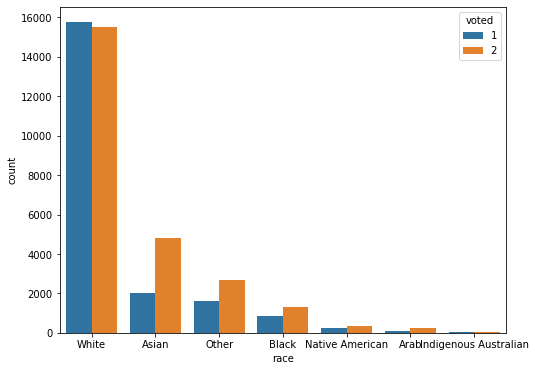

In [11]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'race', hue = train['voted'])

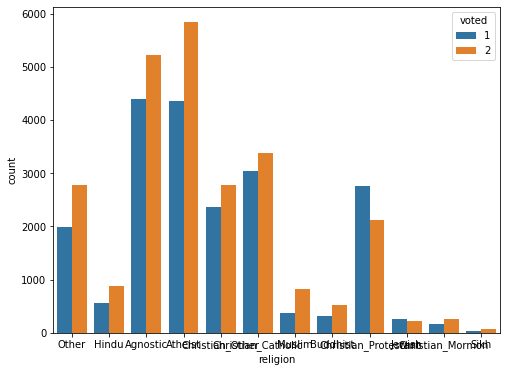

In [12]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'religion', hue = train['voted'])

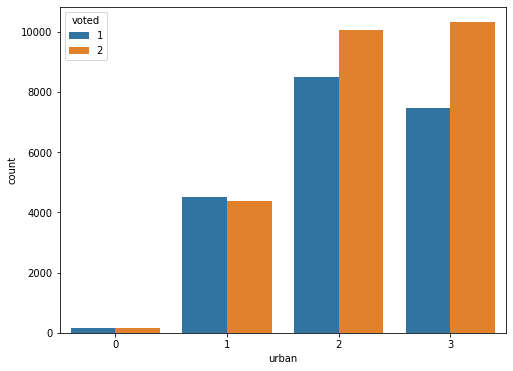

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'urban', hue = train['voted'])

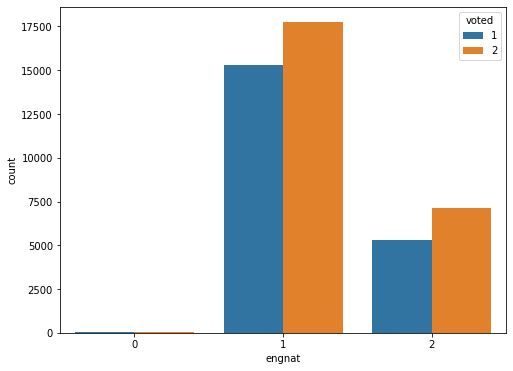

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'engnat', hue = train['voted'])

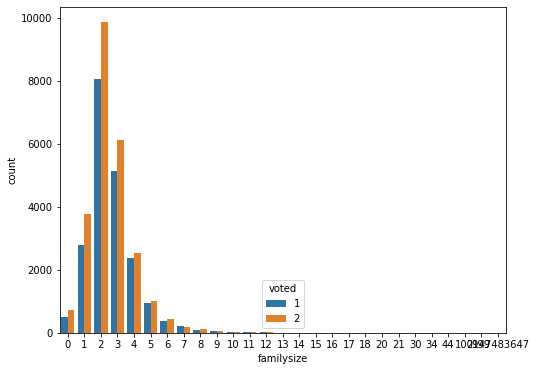

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'familysize', hue = train['voted'])

## 전처리

### 마키아벨리니즘 점수 계산

참고: https://dacon.io/competitions/official/235647/codeshare/1711?page=1&dtype=recent&ptype=pub

In [16]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [17]:
for col in train[Answers]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [18]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]

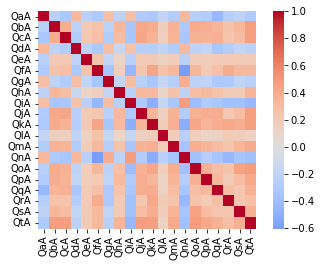

In [19]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [20]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]

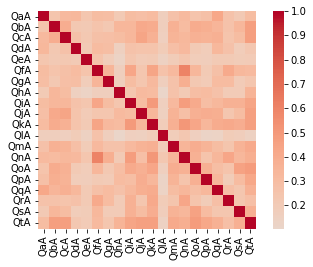

In [21]:
correlations = train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [22]:
train['Mach_score'] = train[Answers].mean(axis = 1)
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.60
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1.90
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.35
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.00


In [23]:
train[['Mach_score']].describe()

,Mach_score
count,45532.000000
mean,3.352474
std,0.794661
min,1.000000
25%,2.750000
50%,3.350000
75%,3.950000
max,5.000000


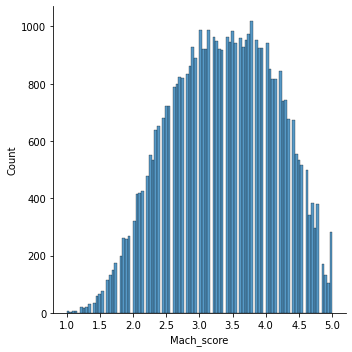

In [24]:
sns.displot(train, x="Mach_score", bins=100)

In [25]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    test[flip] = 6 - test[flip]

flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip]

test['Mach_score'] = test[Answers].mean(axis = 1)

* test에도 동일하게 적용

### 이상치 제거

In [26]:
# familysize 이상치 제거
train= train[train['familysize'] < 30]
print('이상치 제거 후:',train.shape)

이상치 제거 후: (45524, 79)


### 불필요한 변수 삭제

* 응답 시간('Q_E')과 사용하는 손('hand')은 영향이 없을 것으로 생각해 drop

In [27]:
drop_list = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE',
             'index', 'hand']

In [28]:
train = train.drop(drop_list, axis=1)
test = test.drop(drop_list, axis=1)

### 인코딩

In [29]:
train = pd.get_dummies(train)
test= pd.get_dummies(test)

In [30]:
train

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA,education,engnat,familysize,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,...,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
0,3.0,4.0,5.0,5.0,4.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,2.0,1.0,2.0,2.0,4.0,4.0,2.0,1.0,2,1,4,3,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,...,0,0,1,0,1,1,0,1,0,1,1,2.95,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,5.0,3.0,1.0,5.0,3.0,5.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,1.0,5.0,1.0,5.0,4.0,1.0,4,2,3,1,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,...,0,1,1,0,1,1,0,1,0,1,1,2.60,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2.0,1.0,1.0,2.0,1.0,5.0,2.0,1.0,3.0,2.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3,1,3,2,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,...,0,1,1,0,1,1,1,1,0,1,1,1.90,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3.0,3.0,4.0,3.0,5.0,4.0,2.0,3.0,1.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,5.0,4,2,0,1,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1,1,3.35,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5.0,1.0,5.0,4.0,5.0,4.0,5.0,1.0,1.0,5.0,1.0,5.0,4.0,4.0,1.0,4.0,1.0,1.0,1.0,2.0,3,1,2,2,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,...,0,1,1,1,1,1,0,1,1,1,1,3.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,2.0,5.0,4.0,5.0,2.0,4.0,4.0,5.0,5.0,4.0,2,1,1,1,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,...,0,1,1,0,1,1,1,1,0,1,1,4.15,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
45528,4.0,3.0,4.0,5.0,3.0,4.0,4.0,1.0,4.0,5.0,4.0,5.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2,1,2,1,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,...,1,1,1,0,1,1,1,1,0,1,1,3.80,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45529,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2,1,1,1,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,...,0,1,1,0,1,1,0,1,0,1,1,1.50,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
45530,5.0,3.0,4.0,4.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,5.0,4.0,3.0,1.0,1.0,2.0,2.0,4.0,1.0,4,1,2,1,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,...,0,1,1,0,1,1,1,1,0,1,1,2.90,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [31]:
test

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA,education,engnat,familysize,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
0,3.0,2.0,3.0,5.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0,3.0,4.0,3.0,2.0,1.0,2.0,2,2,3,1,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,2.45,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,3.0,2.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,3.0,1.0,5.0,3.0,5.0,2.0,3.0,2.0,1.0,3.0,4.0,2,2,2,1,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.80,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3.0,2.0,4.0,4.0,4.0,4.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,5.0,3.0,3.0,2.0,3.0,5.0,3,2,7,2,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,3.55,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,5.0,1.0,5.0,4.0,1.0,5.0,5.0,1.0,5.0,1.0,3.0,5.0,4.0,5.0,2.0,4.0,1.0,5.0,4.0,1.0,4,1,4,2,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,3.35,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,4.0,1.0,5.0,4.0,4.0,4.0,1.0,1.0,4.0,3.0,1.0,4.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,2,1,3,1,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,2.90,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1.0,5.0,5.0,5.0,4.0,4.0,2.0,1.0,3.0,4.0,2.0,5.0,2.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0,3,2,3,1,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,3.20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
11379,5.0,5.0,5.0,5.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,2,2,1,1,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.55,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11380,5.0,2.0,1.0,4.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,4,1,4,2,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,3.15,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
11381,4.0,1.0,2.0,5.0,4.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,1.0,5.0,3.0,1.0,2.0,4.0,4.0,2.0,2,1,3,2,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,3.05,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


## 모델링

In [32]:
data = train.drop('voted',axis=1)
target = train['voted']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

## Auto ML

In [34]:
! pip install pycaret

In [35]:
from pycaret.classification import *

In [36]:
clf = setup(data = train, target = 'voted')

,Description,Value
0,session_id,3929
1,Target,voted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(45524, 81)"
5,Missing Values,False
6,Numeric Features,50
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6930,0.7655,0.7472,0.6348,0.6864,0.3896,0.3946,0.839
gbc,Gradient Boosting Classifier,0.6938,0.7643,0.7525,0.6346,0.6885,0.3917,0.3973,9.858
lda,Linear Discriminant Analysis,0.6911,0.7600,0.7214,0.6385,0.6774,0.3832,0.3858,1.462
et,Extra Trees Classifier,0.6916,0.7599,0.7421,0.6343,0.6840,0.3865,0.3911,7.680
lr,Logistic Regression,0.6912,0.7593,0.7184,0.6395,0.6766,0.3831,0.3855,4.153
rf,Random Forest Classifier,0.6896,0.7588,0.7439,0.6315,0.6830,0.3829,0.3878,5.658
ada,Ada Boost Classifier,0.6890,0.7565,0.7309,0.6337,0.6788,0.3803,0.3840,2.363
nb,Naive Bayes,0.6639,0.7229,0.7116,0.6078,0.6556,0.3313,0.3353,0.101
knn,K Neighbors Classifier,0.6012,0.6316,0.5201,0.5609,0.5397,0.1888,0.1892,50.307
dt,Decision Tree Classifier,0.6137,0.6094,0.5669,0.5710,0.5689,0.2190,0.2190,0.652


### 로지스틱 회귀

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_val)

In [40]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lr_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, lr_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, lr_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.6871
precision: 0.6406
recall: 0.7057
roc_auc: 0.6887


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_val)

In [42]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, rf_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, rf_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test,rf_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, rf_preds)))

accuracy:0.6904
precision: 0.6355
recall: 0.7432
roc_auc: 0.6949


### Catboost

In [43]:
! pip install catboost

     |████████████████████████████████| 76.4 MB 22 kB/s 


In [44]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_val)

Learning rate set to 0.04517
0:	learn: 0.6786412	total: 62.6ms	remaining: 1m 2s
1:	learn: 0.6660123	total: 82ms	remaining: 40.9s
2:	learn: 0.6577124	total: 92.6ms	remaining: 30.8s
3:	learn: 0.6497135	total: 106ms	remaining: 26.5s
4:	learn: 0.6426812	total: 121ms	remaining: 24.1s
5:	learn: 0.6360678	total: 137ms	remaining: 22.6s
6:	learn: 0.6309922	total: 149ms	remaining: 21.2s
7:	learn: 0.6258246	total: 163ms	remaining: 20.3s
8:	learn: 0.6185493	total: 178ms	remaining: 19.6s
9:	learn: 0.6127968	total: 191ms	remaining: 18.9s
10:	learn: 0.6078628	total: 208ms	remaining: 18.7s
11:	learn: 0.6045750	total: 222ms	remaining: 18.3s
12:	learn: 0.6020805	total: 248ms	remaining: 18.8s
13:	learn: 0.5980442	total: 262ms	remaining: 18.5s
14:	learn: 0.5954328	total: 277ms	remaining: 18.2s
15:	learn: 0.5930120	total: 291ms	remaining: 17.9s
16:	learn: 0.5908132	total: 304ms	remaining: 17.6s
17:	learn: 0.5888130	total: 319ms	remaining: 17.4s
18:	learn: 0.5867559	total: 332ms	remaining: 17.2s
19:	learn: 

In [45]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, cb_preds)))

accuracy:0.6972
precision: 0.6445
recall: 0.7404
roc_auc: 0.7009


### lightGBM

### Gradient Boosting Classifier

### Linear Discriminant Analysis

## test set 으로 확인 후 submission 생성

In [46]:
submission = pd.read_csv('/content/sample_submission.csv')
submission

,index,voted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
11378,11378,0
11379,11379,0
11380,11380,0
11381,11381,0
